# Unsupervised learning (30 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

In this section, we will have a look at unsupervised learning using **principal component analysis** as an example. 

**Exercise** - Unsupervised learning is typically used when the ground truth label is not available. Now, spend three minutes and name some data at your hand that could be used for a unsupervised project. This could be a survival prediction, a segmentation or an image registration task. Discuss with your neighbours.



## What does PCA do?
In a nutshell, PCA constructs a new set of dimensions (i.e. principal components, or PCs) with the following properties:
* the principal coponents are orthogonal, which means they are perpendicular to each other, hence no correlation between PCs;
* the information contained in each PC is in a descending order. E.g. The first PC contains the highest amount of information among all PCs, and the last PC contains the least information. 


## Why these properties are favourable? 
Recall that in machine learning, we typicall face two common challenges:
* the features can be highly correlated, which will lead to instable models;
* due to the optimal sample-to-feature ratio, only a subset of features should be used.

The resultant properties from PCA provide a way to deal with these two issues. 

Let's move on and look at a simple example.

## The first example


### Generate and visualise data
First, we will generate a dataset with two features, `x1` and `x2`. There will be some correlation between these two features.

In [0]:
# Import numpy
import numpy as np

# Generate x1 and x2
mean = [0, 0]
cov = [[10, 5], [5, 10]] # Correlation is specified in this covariance matrix
np.random.seed(1234)
x1, x2 = np.random.multivariate_normal(mean, cov, 500).T

# Examine the Pearson correlation
print("The correlation matrix is\n", np.corrcoef(x1, x2))

The correlation matrix is
 [[1.         0.47179885]
 [0.47179885 1.        ]]


Let's define a function `plotScatter()` and visualise the data we just created.

In [0]:
# Define a function to plot the data
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plotScatter(x1, x2, title="Scatter plot", alpha=0.5):
  plt.scatter(x=x1, y=x2, alpha=alpha)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  plt.show()

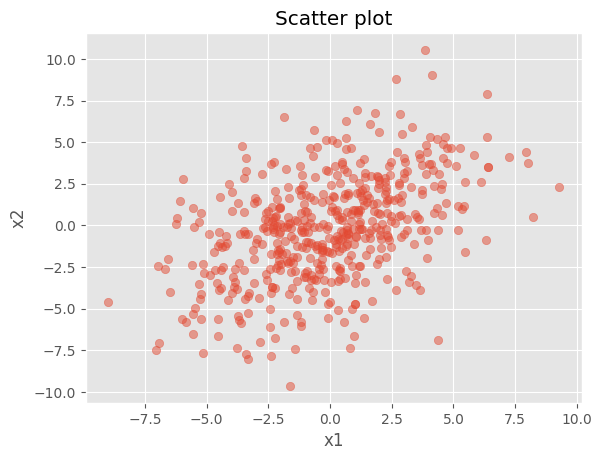

In [0]:
# Visualise
plotScatter(x1, x2)

We can see the data mainly lies in the 45 degree diagonal direction, which will corresponds to the *first principal components*. This is the direction, if we project the data onto it, contains the **largest** variance of the data.


### Perform PCA
Now we will perform PCA to extract the first and second principal components.

In [0]:
# Import the required functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare the data
data = np.array((x1, x2)).T

# Normalise the data to mean 0, standar deviation 1
scaler = StandardScaler()
data_scaled = scaler.fit(data).transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Inspect results
The result of PCA is stored in the `pca` object itself. Let's see what's in there.


In [0]:
print("Number of PCs:", pca.n_components_)
print("First PC:", pca.components_[0, :]) # Python index starts with 0
print("Second PC:", pca.components_[1, :])

Number of PCs: 2
First PC: [0.70710678 0.70710678]
Second PC: [ 0.70710678 -0.70710678]


We can see that 
* the first PC is defined by the vector of (-0.707, -0.707), which is the 45 degree diagonal line. This agrees with the plot. 
* the second PC is defined by the vector of (-0.707, 0.707).

PCs are simply a new set of axes (or directions), which is a linear combination of the orignal axes. Based on the result:

$$PC1 = (-0.707)*x_1 + (-0.707)*x_2$$
$$PC2 = (-0.707)*x_1 + (+0.707)*x_2$$

In this case, **there are only two PCs, as the original data only contains two dimensions**. If the original data has 100 features, the PCA will result in 100 PCs. However, some of them may contain very little information and can be excluded. This is the basis for feature selection.


### Examine properties

Let's examine the properties (orthogonality and variance ranking) of the results.

In [0]:
# Orthogonality
print("The dot product (inner product) of two PCs is", 
      np.dot(pca.components_[:, 0], pca.components_[:, 1]))

The dot product (inner product) of two PCs is 0.0


Two perpendicular vectors will have an inner product of 0.

In [0]:
# Ranking of variance
print("Variance first PC contains is %3.2f." % pca.explained_variance_[0])
print("Variance second PC contains is %3.2f." % pca.explained_variance_[1])

Variance first PC contains is 1.47.
Variance second PC contains is 0.53.


In [0]:
# Ranking of variance
print("Percentage variance first PC: %3.2f." % pca.explained_variance_ratio_[0])
print("Percentage variance second PC: %3.2f." % pca.explained_variance_ratio_[1])

Percentage variance first PC: 0.74.
Percentage variance second PC: 0.26.


We can see that first PC contains the dominant variance (78%) of all the data, and the second PC contains the remaining 22%.

### Transform to PCs
Since PCs are a set of axes, we can project our data this set of axes. This is equivalent to keeping the data points in the plot, but draw another pair of axes. Hence, in the axes defined by the PCs, each data point will have a different coordinate.

In [0]:
# Transform the data to PCs
data_scaled_pca = pca.transform(data_scaled)
print("The shape of the data prior to transformation:", data_scaled.shape)
print("The shape of the data after transformation:", data_scaled_pca.shape)

The shape of the data prior to transformation: (500, 2)
The shape of the data after transformation: (500, 2)


In [0]:
# Examine some coordinates
print("The first data prior to transformation:", data_scaled[0, :])
print("The first data prior to transformation:", data_scaled_pca[0, :])

The first data prior to transformation: [ 0.24136505 -0.94447753]
The first data prior to transformation: [-0.49717561  0.83851733]


The transformed data has the identical shape as the original data, but with different coordinates (as the axes have changed). 

We can also examined the correlation after transformation.

In [0]:
# Examine the Pearson correlation
# Notice computers may have truncation errors,
#  and zero is represented as a very small number (typically less than 1e-7)
print("The correlation matrix is\n", np.corrcoef(data_scaled_pca.T))

The correlation matrix is
 [[1.00000000e+00 1.10996336e-16]
 [1.10996336e-16 1.00000000e+00]]


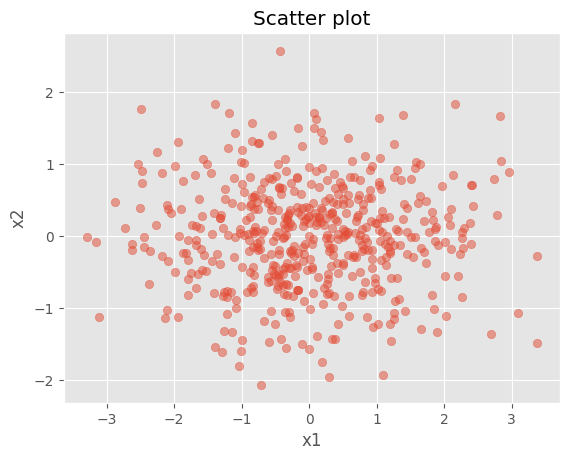

In [0]:
# Visualise the transformed data
plotScatter(data_scaled_pca[:,0], data_scaled_pca[:, 1])

Now the correlation between `x1` and `x2` after transformed to the principal components is 0. No linear relationship can be seen on the scatter plot.

This is the end of the first example.

## PCA for dimension reduction
Dimension reduction can be considered as a *special form* of feature selection. This is because the resultant features from PCA is a **linear combination** of the original features. Each new feature is a mix of one or more original features with corresponding weights. This is different from a typical feature selection (e.g. Random Forest) where a subset of the original atomic features. Hence PCA is often referred as a dimension reduction method. Nonetheless, the main idea is to reduce the number of feature used, which is the key to avoid over-fitting.

We will look at an example using PCA for dimension reduction.

### Inspecting the data
In this exercise, we will use T2w MRI images of a prostate and the texture features computed from it. It's a good use case for PCA as features engineered from the same source tend to contain similar information (hence they can be quite correlated). Using PCA we will extract the uncorrelated key information from the data.

Upload the zipfile `day2_pca.zip` to the cloud using the left-hand-side panel. Unzip the file. Note that the exclamation mark at the beginning indicates that it's a shell command rather than a Python command.

In [0]:
! unzip day2_pca.zip

Archive:  day2_pca.zip
  inflating: images/contour.tiff     
  inflating: images/glcm_autoCorrelation.tiff  
  inflating: images/glcm_contrast.tiff  
  inflating: images/glcm_correlation.tiff  
  inflating: images/glcm_cProminence.tiff  
  inflating: images/glcm_cShade.tiff  
  inflating: images/glcm_cTendency.tiff  
  inflating: images/glcm_differenceEntropy.tiff  
  inflating: images/glcm_dissimilarity.tiff  
  inflating: images/glcm_energy.tiff  
  inflating: images/glcm_entropy.tiff  
  inflating: images/glcm_homogeneity1.tiff  
  inflating: images/glcm_homogeneity2.tiff  
  inflating: images/glcm_IDMN.tiff   
  inflating: images/glcm_IDN.tiff    
  inflating: images/glcm_inverseVariance.tiff  
  inflating: images/glcm_maxProb.tiff  
  inflating: images/glcm_mean.tiff   
  inflating: images/glcm_sumAverage.tiff  
  inflating: images/glcm_sumEntropy.tiff  
  inflating: images/glcm_sumVariance.tiff  
  inflating: images/glcm_variance.tiff  
  inflating: images/glrlm_GLN.tiff   
  inf

There are 47 images in total, one for the T2w image, one contour binary mask, 45 texture features (GLCM: 21, GLRLM:11, GLSZM: 11, LBP:2).  These images are inherently in the same image coordinate so no image registration is required.

Now let's read the images into an object called `images`.

In [0]:
# Import the required library
import os
import skimage
import numpy as np

# Specify the folder
DATA_DIR = 'images'

# List all files
filelist = os.listdir(DATA_DIR)
filelist = [i for i in filelist if i!='contour.tiff']
filelist.sort()

# Read all files (except the contour) into an object using list comprehension
images = np.array([skimage.io.imread(os.path.join(DATA_DIR, i)) 
                            for i in filelist])


Let's have a look at the first image.

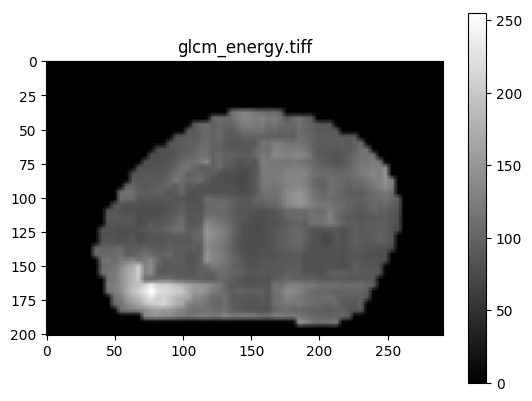

In [0]:
# Inspect one of the image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('default')
plt.imshow(images[10], cmap=cm.gray)
plt.title(filelist[10])
plt.colorbar()

What abou the prostate contour?

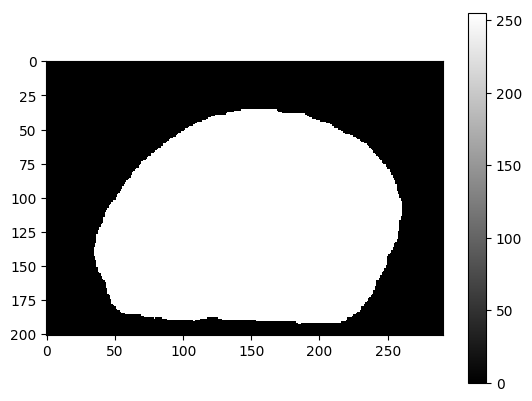

In [0]:
# Read and show the contour
contour = skimage.io.imread('images/contour.tiff')
plt.imshow(contour, cmap=cm.gray)
plt.colorbar()

In [0]:
# Print out the unique values
# Useful for label maps
print("The contour contains these unique values: %s" % np.unique(contour))

The contour contains these unique values: [  0 255]


### Preparing the data
We will use `pandas` to organise the data. The data frame data structure from `pandas` provides a convenient interface to interact with the data.

In [0]:
# Import pands
import pandas as pd

# Specify the column names
# It's simply the filenames with extensions
column_names = [os.path.splitext(i)[0] for i in filelist 
                            if i != 'contour.tiff']

# Create the data frame
# We pull all images into one long array using the reshape method
df = pd.DataFrame(images.reshape((images.shape[0], 
                                  images.shape[1]*images.shape[2])).T, 
                  columns=column_names)

# Print out the dimension of the data frame
print("The data frame has %d rows and %d columes." % df.shape)

The data frame has 58491 rows and 46 columes.


### Region of interest
**Exercise**: Recall from the simple example earlier, we have 500 samples and 2 dimensions. When we switch to imaging data, what are the samples and the dimensions? What are their numbers?

Before we perform PCA on the data, we should isolate the voxels within the prostate region. (Take a minute and think what difference it would be if all voxels in the image are included.) To do that we use the contour to *mask* all the other images:

In [0]:
# Extract rows within the prostate contour
df_contour = df.iloc[np.where(contour.ravel()!=0)[0], ]

# Print out the number of voxels within the prostate
print("There are %d pixels within the prostate contour." % df_contour.shape[0])

There are 28095 pixels within the prostate contour.


### Examine correlation
We can calculate and visualise the inter-feature correlation.

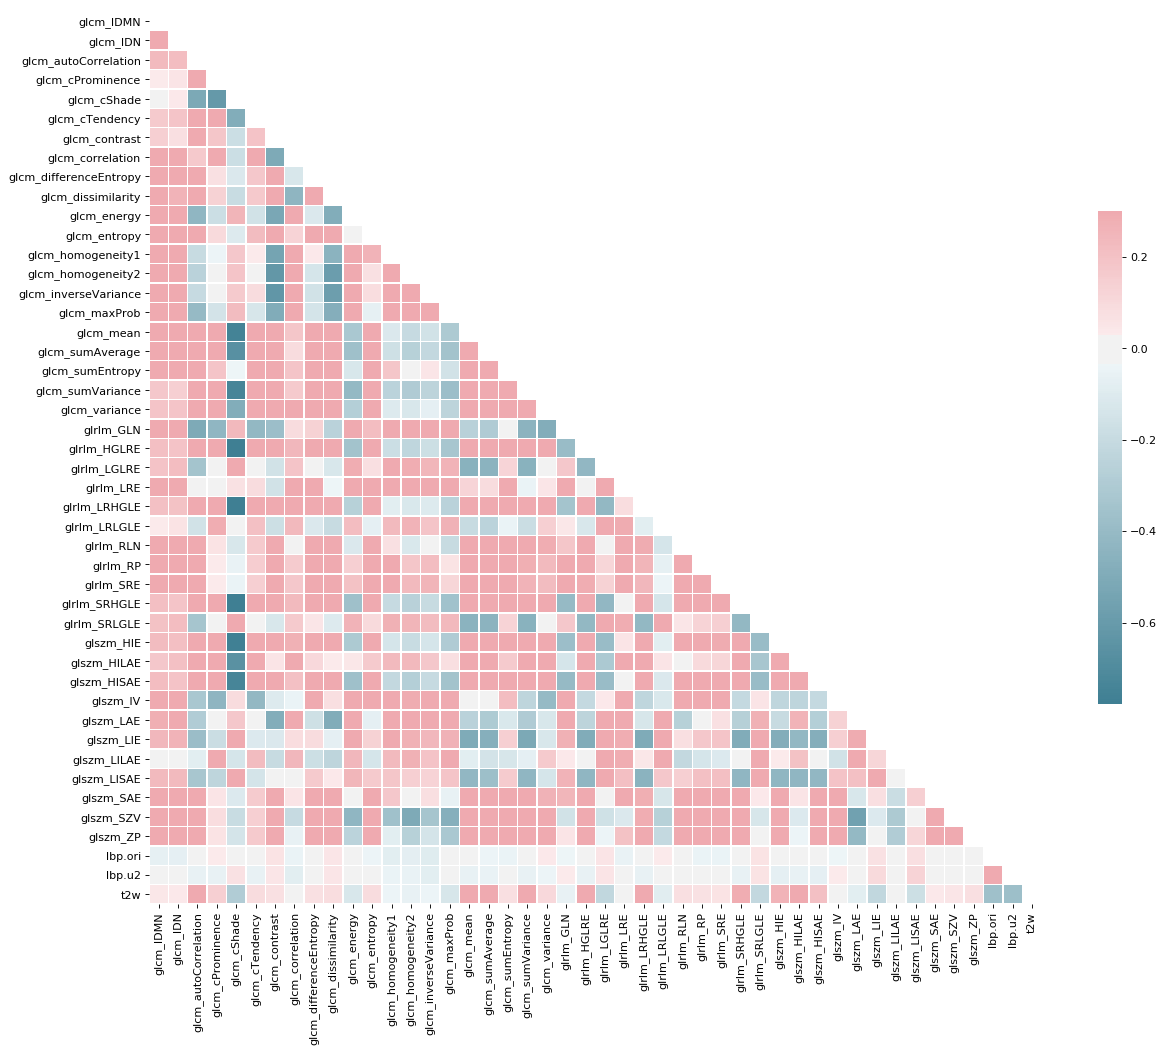

In [0]:
# Calculate the correlation
corr = df_contour.corr(method='pearson')

# Visualise correlation
import seaborn as sns

def showCorrMatrix(corr):
  'Plot the correlation matrix.'
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
  return sns.heatmap(corr, mask=mask, 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                    vmax=0.3,center=0, square=True, 
                    linewidths=0.4, cbar_kws={'shrink': 0.5})

showCorrMatrix(corr)

### Performing PCA on the imaging data
Now it's time to do the PCA.

In [0]:
# Import the require functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalise data
df_contour_value = df_contour.values
scaler2 = StandardScaler()
df_contour_norm = pd.DataFrame(scaler2.fit(df_contour).transform(df_contour),
                              columns=df_contour.columns)

# Perform PCA
pca2 = PCA()
pca2.fit(df_contour_norm)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  import sys


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Similarly, we can get the variance and the percentage variance for each principal component.

In [0]:
# Variance
print('Variance explained:\n', pca2.explained_variance_)
print() # an extra line

# Percentage variance
print('Percentage variance explained:\n', pca2.explained_variance_ratio_)

Variance explained:
 [1.61782791e+01 1.06354930e+01 6.98709194e+00 3.88980011e+00
 1.90550827e+00 1.53725578e+00 1.14777312e+00 8.59095631e-01
 7.41332940e-01 4.63199120e-01 3.52827766e-01 3.08698812e-01
 2.09760520e-01 1.47831091e-01 1.33290287e-01 1.06555606e-01
 9.23368080e-02 7.19342231e-02 6.41837286e-02 3.63862468e-02
 2.48398122e-02 2.20164025e-02 1.74694318e-02 1.34585720e-02
 1.14600013e-02 8.72226668e-03 7.49920115e-03 6.19139966e-03
 4.36702578e-03 3.76386796e-03 3.13954419e-03 2.27212023e-03
 1.58863370e-03 1.31974938e-03 1.12535524e-03 7.29957683e-04
 6.39684981e-04 5.72901912e-04 4.27478486e-04 3.79543022e-04
 2.62811795e-04 2.28958972e-04 2.21781627e-04 1.25183920e-04
 9.19975199e-05 8.95769060e-05]

Percentage variance explained:
 [3.51689202e-01 2.31198139e-01 1.51887897e-01 8.45578622e-02
 4.14226184e-02 3.34174143e-02 2.49507015e-02 1.86753272e-02
 1.61153599e-02 1.00691877e-02 7.66989582e-03 6.71060488e-03
 4.55984901e-03 3.21360499e-03 2.89751180e-03 2.31634376e-03

It's much easier to visualise this in a plot than reading the numbers.

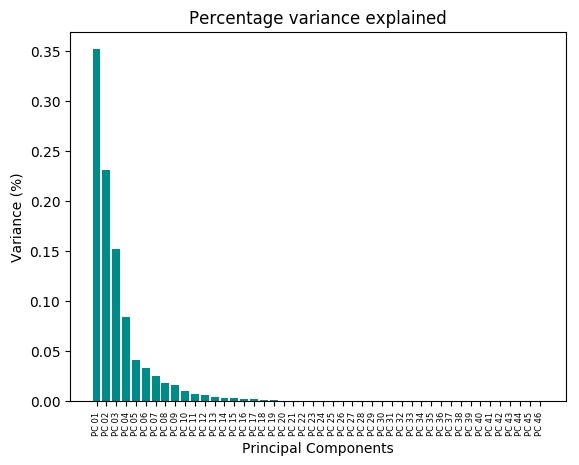

In [0]:
# Visualise the variance for each PC
pc = ['PC ' + str(i+1).zfill(2) for i in range(df_contour.shape[1])]
variances = pca2.explained_variance_ratio_

x_pos = [i for i, _ in enumerate(pc)]
plt.bar(x_pos, variances, color='darkcyan')
plt.xlabel("Principal Components")
plt.ylabel("Variance (%)")
plt.title("Percentage variance explained")
plt.xticks(x_pos, pc, rotation='vertical', fontsize=6)
plt.show()

When using PCA for dimension reduction, we need to pick a number $N$. The rule of thumb is to **select the first $N$ principal components so that 95% of the variance is retained**.

It's hard from the previous plot to see at which PC the accumulative variance exceeds 95%. But we can simply plot out the accumulative varaince.

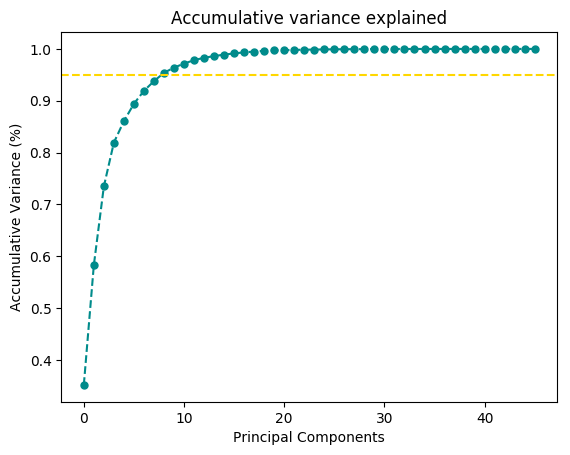

In [0]:
# Plot the data
pc = ['PC ' + str(i+1).zfill(2) for i in range(df_contour.shape[1])]
variance_acc = np.add.accumulate(pca2.explained_variance_ratio_)

plt.plot(variance_acc, '--o', markersize=5, color='darkcyan')
plt.xlabel("Principal Components")
plt.ylabel("Accumulative Variance (%)")
plt.title("Accumulative variance explained")
plt.axhline(y=0.95, color='gold', linestyle='--')

We can see that the first 9 PCs will have a total percentage varaince over 95%. In practise, we will choose 9 in this case. This is how we use PCA for dimension reduction.

But wait, what exactly are these 9 PCs?

**Exercise**: How do we get each PC? Refer to the first example and get PC1 in this case.

### Examine the relationship between features
The coefficient for each PC contain the relationship of the features. For example, we know PC1 contains the highest variance. By examining its composition, we can tell how the original features are combined to form PC1.

The following code prints out the top 10 most important features that make up PC1. 

In [0]:
# Extract the coefficient of PC1
pc1_coeff = pca2.components_[0, :]

# Construct a data frame for PC1
pc1 = pd.DataFrame(pc1_coeff, index=df_contour_norm.columns, 
                   columns=['coefficient'])
print(pc1.sort_values('coefficient')[:10])


                      coefficient
glcm_sumAverage         -0.239160
glcm_mean               -0.235996
glrlm_SRHGLE            -0.228843
glszm_HISAE             -0.227214
glcm_sumVariance        -0.226915
glrlm_HGLRE             -0.226424
glszm_HIE               -0.223576
glcm_autoCorrelation    -0.216749
glrlm_LRHGLE            -0.212666
glcm_dissimilarity      -0.182329


This shows that when the original features are linearly combined in this manner the information contained is maximised. The coefficients indicate the 'effective proportion' or the association between features. This reveals the intrinsic pattern within the data, without any use of labels (the definition of unsupervised learning).

We can visualise the data using bar plots. Here it's the relative magnitude matters.

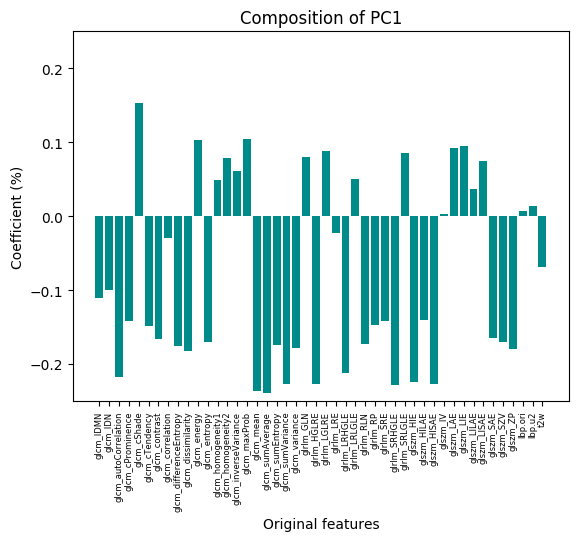

In [0]:
# Visualise the composition of PC1
x_pos = [i for i, _ in enumerate(pc1.index)]
plt.bar(x_pos, pc1.coefficient, color='darkcyan')
plt.xlabel("Original features")
plt.ylabel("Coefficient (%)")
plt.title("Composition of PC1")
plt.xticks(x_pos, pc1.index, rotation='vertical', fontsize=6)
plt.ylim((-0.25, 0.25))
plt.show()

### Examine the correlations
We can examine the correlation for the PCs, which should be zero theoretically.

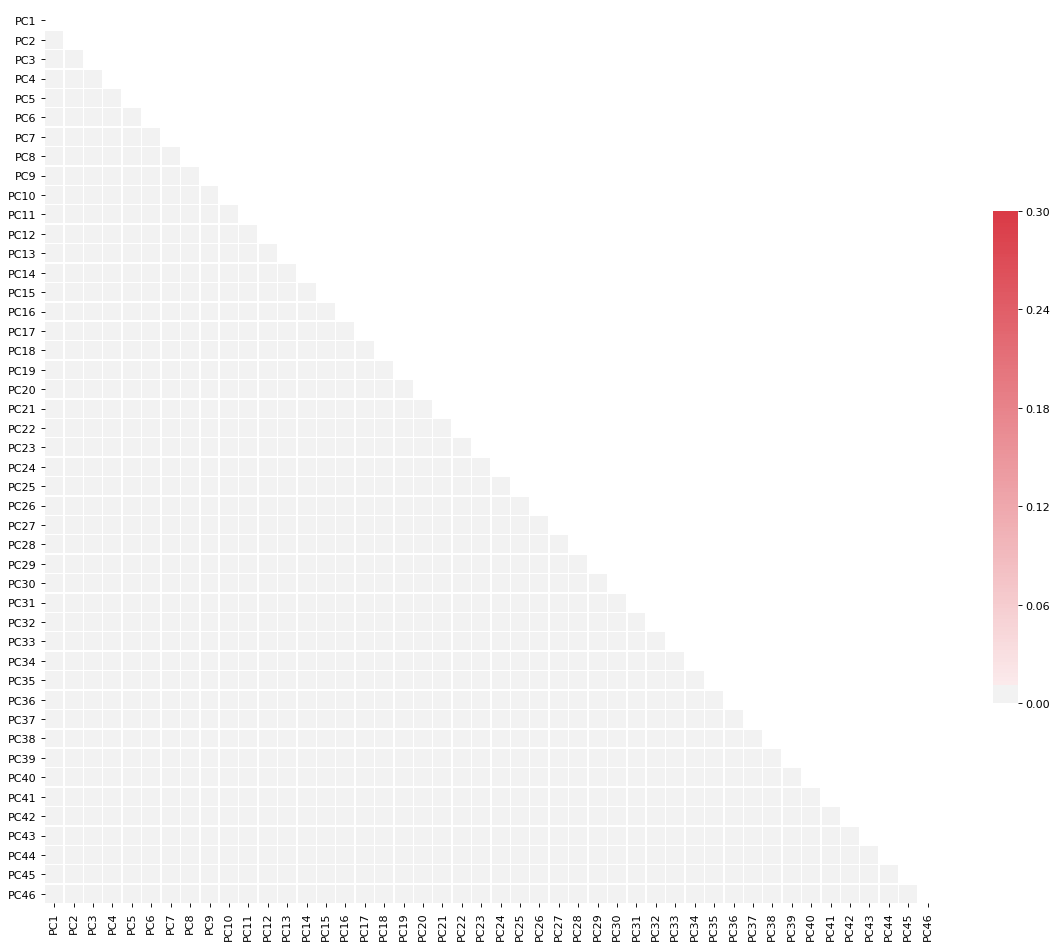

In [0]:
# Get the PCs
df_contour_norm_pca = pd.DataFrame(pca2.transform(df_contour_norm),
          columns=['PC'+str(i+1) for i in range(df_contour_norm.shape[1])])

# Plot the correlation matrix
showCorrMatrix(df_contour_norm_pca.corr())

## Wrap up
PCA is a widely used unsupervised algorithm for unsupervised learning. It decomposes the original dimensions in the data and reconstructs a new set of dimensions, known as principal components. Two important properties of PCs:
* they are orthogonal (zero correlation); and
* the order corresponds to the amount of information contained (measured by variance).

You can apply PCA for dimension reduction by choosing the first $N$ principal components that retain 95% total variance.


However, PCA does come with some limitations. Here are some:
* it's sensitive to scaling, so normalisation is important;
* the resultant PC is a mix of the original features, hence interpretation is compromised. For example, what is the meaning of $0.5*T2w + 0.3*ADC$?
* if your model takes PC as features, the *exact* preprocessing procedure should be applied on the test data in order to use the model.




In [0]:
# Print the session information for reproducibility purposes
import IPython
print(IPython.sys_info())



---

This is the end of the session.
